# BCI Portfolio Project 1: EEG Signal Preprocessing Toolkit

Extracting EDF parameters from c:\Users\Arl3t\Projects\BCI Portfolio Projects\bci_portfolio_projects\S001R01.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 9759  =      0.000 ...    60.994 secs...
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Using matplotlib as 2D backend.


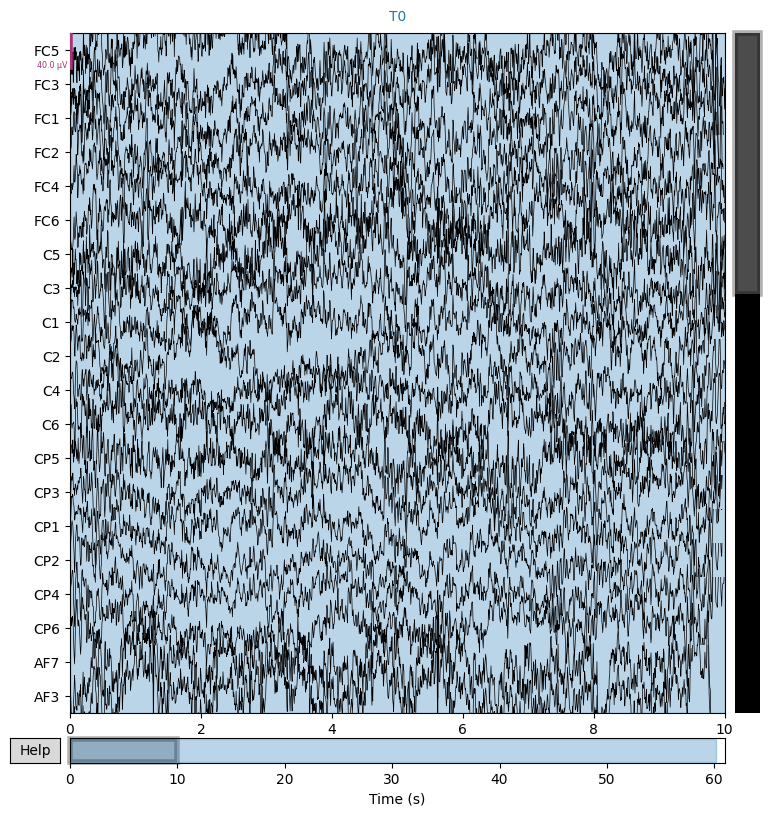

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 529 samples (3.306 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  52 out of  52 | elapsed:    0.0s finished


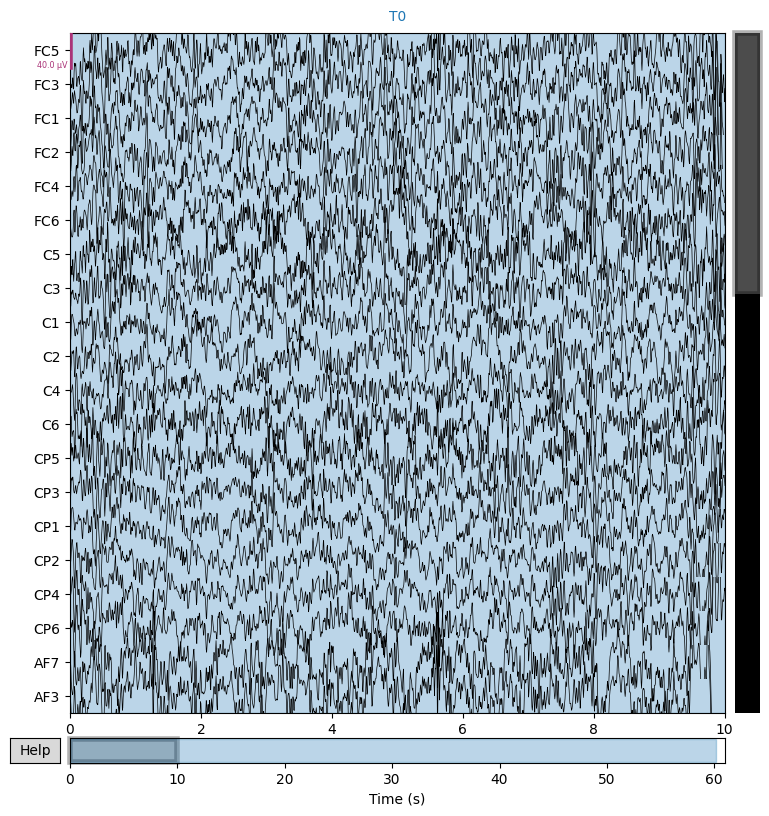

Fitting ICA to data using 52 channels (please be patient, this may take a while)
Selecting by number: 15 components
Fitting ICA took 0.5s.


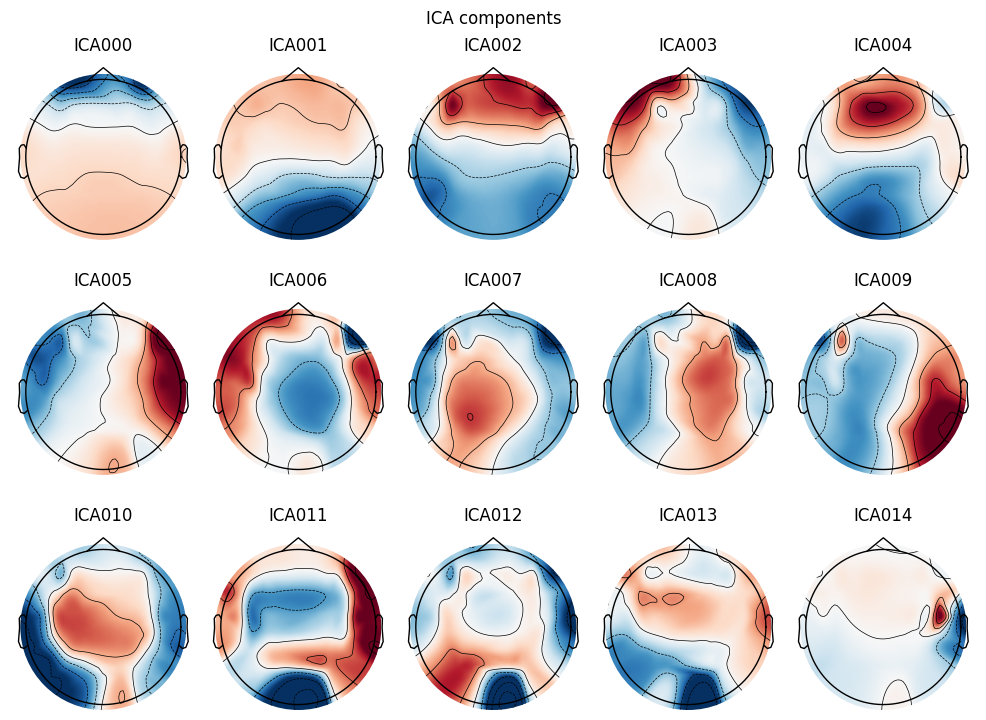

NOTE: plot_psd() is a legacy function. New code should use .compute_psd().plot().
Effective window size : 12.800 (s)
Plotting power spectral density (dB=True).


C:\Users\Arl3t\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\mne\viz\utils.py:158: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  (fig or plt).show(**kwargs)


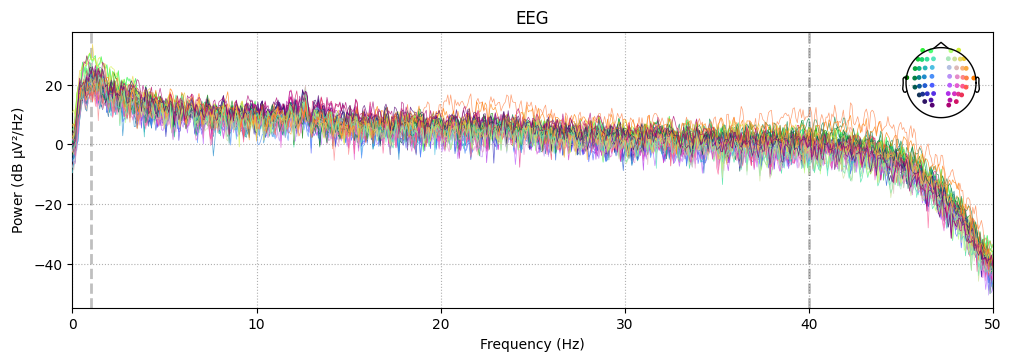

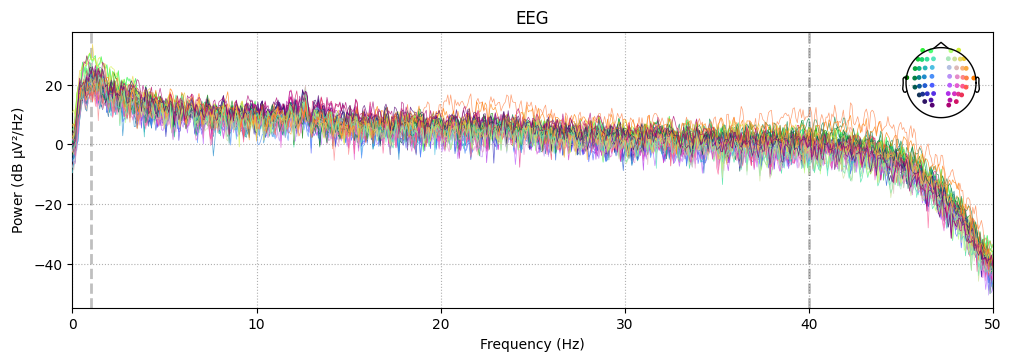

In [1]:
import mne
import numpy as np
import matplotlib.pyplot as plt
from mne.preprocessing import ICA
import os

eeg_file = 'c:/Users/Arl3t/Projects/BCI Portfolio Projects/bci_portfolio_projects/S001R01.edf'
if not os.path.exists(eeg_file):
    import urllib.request
    url = "https://physionet.org/files/eegmmidb/1.0.0/S001/S001R01.edf"
    os.makedirs(os.path.dirname(eeg_file), exist_ok=True)
    print(f"Downloading EEG file from {url} ...")
    urllib.request.urlretrieve(url, eeg_file)
    print(f"Downloaded EEG file to: {eeg_file}")

raw = mne.io.read_raw_edf(eeg_file, preload=True)

# Clean channel names
mapping = {ch: ch.replace('.', '').upper() for ch in raw.ch_names}
raw.rename_channels(mapping)

# Set montage to 'standard_1020' and drop channels not in the montage to avoid overlap errors
montage = mne.channels.make_standard_montage('standard_1020')
# Keep only channels present in both the data and the montage
common_chs = [ch for ch in raw.ch_names if ch in montage.ch_names]
raw.pick_channels(common_chs)
raw.set_montage(montage)

# Average reference
raw.set_eeg_reference('average')

# Plot raw data
raw.plot(title="Raw EEG Data")

# Bandpass filter
raw.filter(1., 40., fir_design='firwin')
raw.plot(title="Filtered EEG Data")

# ICA for artifact removal
ica = ICA(n_components=15, random_state=97)
ica.fit(raw)
ica.plot_components(sensors=False)

# Uncomment and update after inspecting ICA components
# raw_clean = raw.copy()
# ica.exclude = [0]  # update this list after inspecting components
# ica.apply(raw_clean)
# raw_clean.save('subject1_run1_preprocessed_raw.fif', overwrite=True)

# Plot PSD
raw.plot_psd(fmax=50)

In [2]:
raw_clean = raw.copy()
ica.exclude = [0]  # Replace [0] with the indices of artifact components you identified
ica.apply(raw_clean)

Applying ICA to Raw instance
    Transforming to ICA space (15 components)


    Zeroing out 1 ICA component
    Projecting back using 52 PCA components


<RawEDF | S001R01.edf, 52 x 9760 (61.0 s), ~3.9 MiB, data loaded>

In [3]:
raw_clean.save('subject1_run1_preprocessed_raw.fif', overwrite=True)

Overwriting existing file.
Writing c:\Users\Arl3t\Projects\BCI Profolio Projects\bci_portfolio_projects\subject1_run1_preprocessed_raw.fif
Closing c:\Users\Arl3t\Projects\BCI Profolio Projects\bci_portfolio_projects\subject1_run1_preprocessed_raw.fif
[done]


[WindowsPath('c:/Users/Arl3t/Projects/BCI Profolio Projects/bci_portfolio_projects/subject1_run1_preprocessed_raw.fif')]